# Multiclases

In [33]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sn

In [7]:
!pip install scikit-learn

In [3]:
df = pd.read_csv('tweets.csv')
df

,clean_text,category
0,when modi promised “minimum government maximum...,Negativo
1,talk all the nonsense and continue all the dra...,Neutro
2,what did just say vote for modi welcome bjp t...,Positivo
3,asking his supporters prefix chowkidar their n...,Positivo
4,answer who among these the most powerful world...,Positivo
...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo
162964,dear rss terrorist payal gawar what about modi...,Negativo
162965,did you cover her interaction forum where she ...,Neutro
162966,there big project came into india modi dream p...,Neutro


<Axes: >

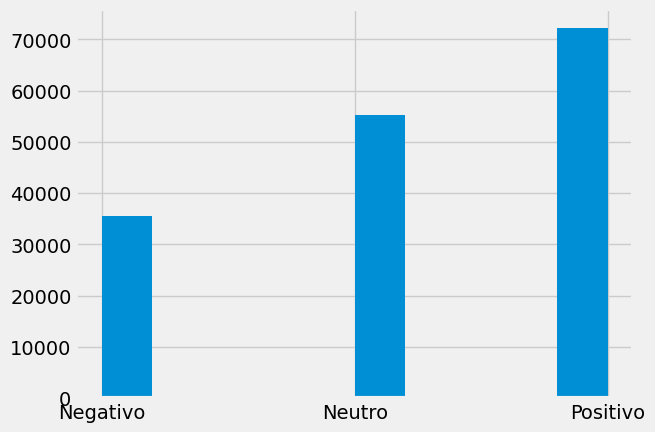

In [4]:
df['category'].hist()

Mapear los tweets

In [5]:
target_map ={'Positivo':1, 'Negativo':0, 'Neutro':2}
df['target'] = df['category'].map(target_map)
df

,clean_text,category,target
0,when modi promised “minimum government maximum...,Negativo,0
1,talk all the nonsense and continue all the dra...,Neutro,2
2,what did just say vote for modi welcome bjp t...,Positivo,1
3,asking his supporters prefix chowkidar their n...,Positivo,1
4,answer who among these the most powerful world...,Positivo,1
...,...,...,...
162963,why these 456 crores paid neerav modi not reco...,Negativo,0
162964,dear rss terrorist payal gawar what about modi...,Negativo,0
162965,did you cover her interaction forum where she ...,Neutro,2
162966,there big project came into india modi dream p...,Neutro,2


Dividir los datos

In [8]:
from sklearn.model_selection import train_test_split # Import the train_test_split function
df_train, df_test = train_test_split(df)

In [9]:
df_train.head()

,clean_text,category,target
60761,modiamit shahs tension power danger nation tod...,Neutro,2
102877,abe desh pradhanmantri desh police cbi media k...,Neutro,2
47734,hey did modi announce because scientists execu...,Neutro,2
20768,how end his day modi modi,Neutro,2
104173,modi will get three terms till 2026nostradamus...,Positivo,1


Vectorizar

In [19]:
vectorizer = TfidfVectorizer(max_features=2500)
X_train = vectorizer.fit_transform(df_train['clean_text'])
X_train

<122226x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 1818968 stored elements in Compressed Sparse Row format>

In [20]:
X_test = vectorizer.transform(df_test['clean_text'])
X_test

<40742x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 608995 stored elements in Compressed Sparse Row format>

In [21]:
Y_train = df_train['target']
Y_test = df_test['target']

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print("Train:", model.score(X_train, Y_train))
print("Test:", model.score(X_test, Y_test))

Train: 0.9136599414199925
Test: 0.907859211624368


In [23]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [26]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.80359344, 0.10567405, 0.09073251],
       [0.03293192, 0.91852905, 0.04853903],
       [0.00808462, 0.013313  , 0.97860238]])

In [35]:
def plot_cm(cm):
    classes = ['negativo', 'positivo', 'neutro']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")

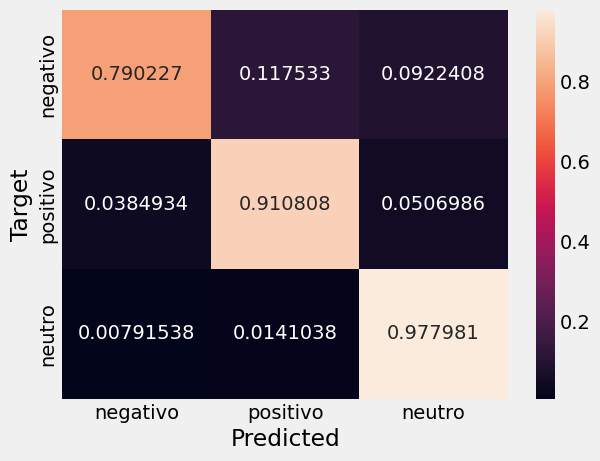

In [36]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)